In [4]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [5]:
data = r"C:\Users\agaro\Documents\GitHub\Chiron\dataset1.csv"

df = pd.read_csv(data)
print(df.head())

                                                link  \
0  https://www.infowars.com/posts/the-wall-is-rea...   
1  https://www.infowars.com/posts/post-vaccinatio...   
2  https://www.infowars.com/posts/half-of-all-wom...   
3  https://www.infowars.com/posts/high-levels-of-...   
4  https://www.infowars.com/posts/epidemiologist-...   

                                               title  annotation  \
0  The Wall Is Real: Half of All Thirty-Something...           0   
1  “Post-Vaccination Syndrome:” New Paper Identif...           0   
2  Half of All Women in US Aged 30-35 Experiencin...           0   
3  High Levels of Microplastics Found in Lungs of...           0   
4  Epidemiologist Reveals New Data Linking Covid ...           0   

                                             content  
0  It’s a staple of the so-called “manosphere”—th...  
1  A new condition called “post-vaccination syndr...  
2  Half of all women in their 30s are now reporti...  
3  The lungs of birds contain sign

In [6]:
import string
string.punctuation

# Checks the contents if there are empty or missing values

uncleanContents = df[df['content'].isna() | (df['content'].str.strip() == '')].index

# Print the missing/empty indices
print(f'Indices with missing or empty content: {uncleanContents}')
# print('empty content example: ' + (df['content'])[217])
# Fill NaN values with empty strings
df['content'].fillna('', inplace=True)

print(f"First file rows: {len(df)}")

Indices with missing or empty content: Index([58, 185, 203, 210, 274, 289, 2018, 2019, 2020, 2021], dtype='int64')
First file rows: 2801


First step we are doing is data cleaning and preprocessing

In [7]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation and i not in ["'", '"', '—', '“', '”', '’', '––', '–']])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['content'].apply(lambda x:remove_punctuation(x))
df.head()

,link,title,annotation,content,clean_msg
0,https://www.infowars.com/posts/the-wall-is-rea...,The Wall Is Real: Half of All Thirty-Something...,0,It’s a staple of the so-called “manosphere”—th...,Its a staple of the socalled manospherethat gl...
1,https://www.infowars.com/posts/post-vaccinatio...,“Post-Vaccination Syndrome:” New Paper Identif...,0,A new condition called “post-vaccination syndr...,A new condition called postvaccination syndrom...
2,https://www.infowars.com/posts/half-of-all-wom...,Half of All Women in US Aged 30-35 Experiencin...,0,Half of all women in their 30s are now reporti...,Half of all women in their 30s are now reporti...
3,https://www.infowars.com/posts/high-levels-of-...,High Levels of Microplastics Found in Lungs of...,0,The lungs of birds contain significant quantit...,The lungs of birds contain significant quantit...
4,https://www.infowars.com/posts/epidemiologist-...,Epidemiologist Reveals New Data Linking Covid ...,0,"Nicolas Hulscher, an epidemiologist with the M...",Nicolas Hulscher an epidemiologist with the Mc...


In [8]:
# standardization: making all letters into lowercase
df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())
df.head()

,link,title,annotation,content,clean_msg,msg_lower
0,https://www.infowars.com/posts/the-wall-is-rea...,The Wall Is Real: Half of All Thirty-Something...,0,It’s a staple of the so-called “manosphere”—th...,Its a staple of the socalled manospherethat gl...,its a staple of the socalled manospherethat gl...
1,https://www.infowars.com/posts/post-vaccinatio...,“Post-Vaccination Syndrome:” New Paper Identif...,0,A new condition called “post-vaccination syndr...,A new condition called postvaccination syndrom...,a new condition called postvaccination syndrom...
2,https://www.infowars.com/posts/half-of-all-wom...,Half of All Women in US Aged 30-35 Experiencin...,0,Half of all women in their 30s are now reporti...,Half of all women in their 30s are now reporti...,half of all women in their 30s are now reporti...
3,https://www.infowars.com/posts/high-levels-of-...,High Levels of Microplastics Found in Lungs of...,0,The lungs of birds contain significant quantit...,The lungs of birds contain significant quantit...,the lungs of birds contain significant quantit...
4,https://www.infowars.com/posts/epidemiologist-...,Epidemiologist Reveals New Data Linking Covid ...,0,"Nicolas Hulscher, an epidemiologist with the M...",Nicolas Hulscher an epidemiologist with the Mc...,nicolas hulscher an epidemiologist with the mc...


In [9]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
#defining function for tokenization

#applying function to the column
df['msg_tokenized'] = df['msg_lower'].apply(lambda x: word_tokenize(x))

print(df['msg_tokenized'][1])

['a', 'new', 'condition', 'called', 'postvaccination', 'syndrome', 'has', 'been', 'acknowledged', 'by', 'yale', 'scientists', 'investigating', 'the', 'longterm', 'aftereffects', 'of', 'covid19', 'vaccination', 'the', 'condition', 'is', 'characterised', 'by', 'a', 'variety', 'of', 'troubling', 'symptoms', 'including', 'brain', 'fog', 'insomnia', 'tinnitus', 'and', 'heart', 'palpitations', 'and', 'resembles', 'the', 'condition', 'dubbed', 'long', 'covid', 'the', 'symptoms', 'typically', 'develop', 'a', 'day', 'or', 'two', 'after', 'vaccination', 'and', 'can', 'persist', 'for', 'months', 'or', 'even', 'years', 'worsening', 'over', 'time', 'its', 'clear', 'that', 'some', 'individuals', 'are', 'experiencing', 'significant', 'challenges', 'after', 'vaccination', 'our', 'responsibility', 'as', 'scientists', 'and', 'clinicians', 'is', 'to', 'listen', 'to', 'their', 'experiences', 'rigorously', 'investigate', 'the', 'underlying', 'causes', 'and', 'seek', 'ways', 'to', 'help', 'said', 'cosenior'

In [11]:
#importing nlp library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import nltk
# Download stopwords if you haven't already
nltk.download('stopwords')

# Initialize stopwords (use only ONE of these lines)
stopwords = set(nltk.corpus.stopwords.words('english'))

# Add custom stopwords
# custom_stopwords = ["coronavirus", "covid19", "people", "virus", "health", "china", "chinese", "new", "us", "vaccine", "wuhan", "video", "outbreak", "hospital", "says", "novel"]
# stopwords = stopwords | set(custom_stopwords)

# Add custom stopwords
custom_stopwords = ["'", '"', '—', '“', '”', '’', '––', '–', 'said', 'human', 'people', 'health', 'also', 'would', 'could', 'said', '2025', '2024', 'dec', 'feb', 'jan', 'nov', 'oct', 'sept', 'aug', 'july', 'june',
                                                                                                'may', 'april', 'march']
stopwords = stopwords | set(custom_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:

# Add custom stopwords
# custom_stopwords = ["coronavirus", "covid19", "people", "virus", "health", "china", "chinese", "new", "us", "vaccine", "wuhan", "video", "outbreak", "hospital", "says", "novel"]  # Add your custom stopwords here
# stopwords = stopwords.union(custom_stopwords)
# stopwords = set(stopwords).union(custom_stopwords)
# stopwords = set(stopwords) | set(custom_stopwords)
# stopwords = set(stopwords) | set(custom_stopwords)
# stopwords = stopwords | set(custom_stopwords)

# defining functions for removing stopwords
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

df['no_stopwords']= df['msg_tokenized'].apply(lambda x:remove_stopwords(x))
print(df['no_stopwords'][1])

['new', 'condition', 'called', 'postvaccination', 'syndrome', 'acknowledged', 'yale', 'scientists', 'investigating', 'longterm', 'aftereffects', 'covid19', 'vaccination', 'condition', 'characterised', 'variety', 'troubling', 'symptoms', 'including', 'brain', 'fog', 'insomnia', 'tinnitus', 'heart', 'palpitations', 'resembles', 'condition', 'dubbed', 'long', 'covid', 'symptoms', 'typically', 'develop', 'day', 'two', 'vaccination', 'persist', 'months', 'even', 'years', 'worsening', 'time', 'clear', 'individuals', 'experiencing', 'significant', 'challenges', 'vaccination', 'responsibility', 'scientists', 'clinicians', 'listen', 'experiences', 'rigorously', 'investigate', 'underlying', 'causes', 'seek', 'ways', 'help', 'cosenior', 'author', 'harlan', 'krumholz', 'researchers', 'looked', 'blood', 'samples', '42', 'patients', 'experienced', 'symptoms', 'postvaccination', 'syndrome', '22', 'syndrome', 'found', 'lower', 'levels', 'true', 'crucial', 'white', 'bloodcell', 'types', 'lower', 'level

In [14]:
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [15]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

# consideration: the results of stemming here is not human readable, but according to chatgpt: However, if your goal is purely text classification (like Naive Bayes or TF-IDF), these changes may not be a problem, as long as your model learns meaningful patterns.
df['msg_stemmed'] = df['no_stopwords'].apply(lambda x: stemming(x))
print(df['msg_stemmed'][1])

['new', 'condit', 'call', 'postvaccin', 'syndrom', 'acknowledg', 'yale', 'scientist', 'investig', 'longterm', 'aftereffect', 'covid19', 'vaccin', 'condit', 'characteris', 'varieti', 'troubl', 'symptom', 'includ', 'brain', 'fog', 'insomnia', 'tinnitu', 'heart', 'palpit', 'resembl', 'condit', 'dub', 'long', 'covid', 'symptom', 'typic', 'develop', 'day', 'two', 'vaccin', 'persist', 'month', 'even', 'year', 'worsen', 'time', 'clear', 'individu', 'experienc', 'signific', 'challeng', 'vaccin', 'respons', 'scientist', 'clinician', 'listen', 'experi', 'rigor', 'investig', 'underli', 'caus', 'seek', 'way', 'help', 'cosenior', 'author', 'harlan', 'krumholz', 'research', 'look', 'blood', 'sampl', '42', 'patient', 'experienc', 'symptom', 'postvaccin', 'syndrom', '22', 'syndrom', 'found', 'lower', 'level', 'true', 'crucial', 'white', 'bloodcel', 'type', 'lower', 'level', 'antibodi', 'covid19', 'spike', 'protein', 'case', 'higher', 'level', 'spike', 'protein', 'dont', 'know', 'level', 'spike', 'prot

In [16]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

df['msg_lemmatized'] = df['no_stopwords'].apply(lambda x:lemmatizer(x))
print(df['msg_lemmatized'][1])

['new', 'condition', 'called', 'postvaccination', 'syndrome', 'acknowledged', 'yale', 'scientist', 'investigating', 'longterm', 'aftereffect', 'covid19', 'vaccination', 'condition', 'characterised', 'variety', 'troubling', 'symptom', 'including', 'brain', 'fog', 'insomnia', 'tinnitus', 'heart', 'palpitation', 'resembles', 'condition', 'dubbed', 'long', 'covid', 'symptom', 'typically', 'develop', 'day', 'two', 'vaccination', 'persist', 'month', 'even', 'year', 'worsening', 'time', 'clear', 'individual', 'experiencing', 'significant', 'challenge', 'vaccination', 'responsibility', 'scientist', 'clinician', 'listen', 'experience', 'rigorously', 'investigate', 'underlying', 'cause', 'seek', 'way', 'help', 'cosenior', 'author', 'harlan', 'krumholz', 'researcher', 'looked', 'blood', 'sample', '42', 'patient', 'experienced', 'symptom', 'postvaccination', 'syndrome', '22', 'syndrome', 'found', 'lower', 'level', 'true', 'crucial', 'white', 'bloodcell', 'type', 'lower', 'level', 'antibody', 'covi

In [18]:
# Filter rows where 'annotation' is 1
authentic_tokens = df[df['annotation'] == 1]['msg_lemmatized']

# Display the filtered tokens
print("Preprocessed Tokens with Annotation = 1:")
print("Length: " + str(len(authentic_tokens)))
print(authentic_tokens)

Preprocessed Tokens with Annotation = 1:
Length: 1401
400     [20, fda, approved, new, fastacting, insulin, ...
401     [20, athlete, certain, heart, condition, long,...
402     [19, u, hospital, see, dangerous, shortage, be...
403     [19, vaccine, pregnant, woman, protects, baby,...
404     [18, fda, approved, vimseltinib, new, oral, dr...
                              ...                        
1796    [recent, national, survey, showed, estimated, ...
1797    [mr, 48yearold, married, man, 3, child, seeing...
1798    [physician, researcher, continue, refine, unde...
1799    [vaccination, rate, low, measles, case, child,...
1800    [kaiser, news, 17yearold, boy, shaggy, blond, ...
Name: msg_lemmatized, Length: 1401, dtype: object


In [19]:
# Filter rows where 'annotation' is 1
fake_tokens = df[df['annotation'] == 0]['msg_lemmatized']

# Display the filtered tokens
print("Preprocessed Tokens with Annotation = 0:")
print("Length: " + str(len(fake_tokens)))
print(fake_tokens)

Preprocessed Tokens with Annotation = 0:
Length: 1400
0       [staple, socalled, manospherethat, glamorous, ...
1       [new, condition, called, postvaccination, synd...
2       [half, woman, 30, reporting, early, symptom, m...
3       [lung, bird, contain, significant, quantity, m...
4       [nicolas, hulscher, epidemiologist, mccullough...
                              ...                        
2796    [new, randomized, controlled, trial, published...
2797    [trade, union, professional, body, represents,...
2798    [finnish, vaccine, expert, world, organization...
2799    [realisation, ‘, whole, covid, situation, frau...
2800    [america, intentionally, attack, many, incarna...
Name: msg_lemmatized, Length: 1400, dtype: object



Word Pool (Top 20):
[('patient', 4105), ('study', 3872), ('risk', 3074), ('year', 2511), ('disease', 2398), ('new', 2098), ('time', 1998), ('one', 1998), ('treatment', 1942), ('cancer', 1933), ('care', 1829), ('like', 1824), ('blood', 1697), ('drug', 1690), ('researcher', 1652), ('symptom', 1649), ('get', 1633), ('research', 1626), ('use', 1509), ('help', 1503), ('u', 1479), ('heart', 1469), ('woman', 1401), ('child', 1364), ('vaccine', 1362), ('many', 1341), ('found', 1295), ('covid', 1276), ('weight', 1270), ('medical', 1268), ('medication', 1263), ('according', 1242), ('body', 1232), ('need', 1212), ('age', 1205), ('university', 1199), ('medicine', 1196), ('day', 1189), ('level', 1185), ('make', 1150), ('food', 1147), ('doctor', 1134), ('md', 1127), ('among', 1114), ('condition', 1108), ('case', 1108), ('diabetes', 1075), ('adult', 1064), ('type', 1064), ('week', 1059)]


C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


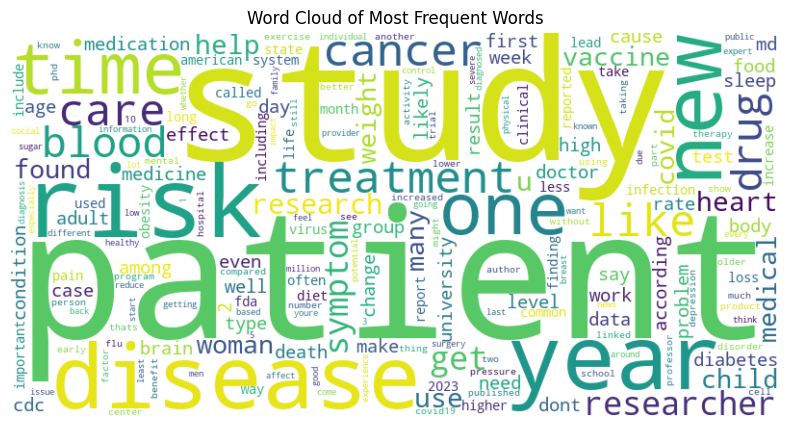

In [20]:
# Create a word pool (frequency distribution) for AUTHENTIC NEWS
word_pool = Counter()
for tokens in authentic_tokens:
    word_pool.update(tokens)

# Display the most common words
print("\nWord Pool (Top 20):")
print(word_pool.most_common(50))

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_pool)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()


Word Pool (Top 20):
[('vaccine', 4964), ('study', 2244), ('food', 2166), ('covid19', 2033), ('one', 1920), ('child', 1880), ('new', 1837), ('like', 1546), ('year', 1522), ('u', 1509), ('state', 1473), ('related', 1452), ('cancer', 1450), ('government', 1378), ('time', 1371), ('covid', 1331), ('disease', 1325), ('public', 1304), ('medical', 1294), ('risk', 1288), ('drug', 1211), ('knowledge', 1138), ('even', 1126), ('according', 1123), ('video', 1115), ('many', 1086), ('death', 1086), ('case', 1078), ('free', 1054), ('found', 1037), ('using', 1025), ('use', 1023), ('dr', 1006), ('freedom', 1005), ('american', 987), ('help', 985), ('biden', 971), ('report', 964), ('research', 961), ('story', 955), ('effect', 950), ('including', 937), ('pandemic', 930), ('brighteoncom', 919), ('world', 904), ('percent', 896), ('ai', 869), ('system', 858), ('include', 856), ('support', 855)]


C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


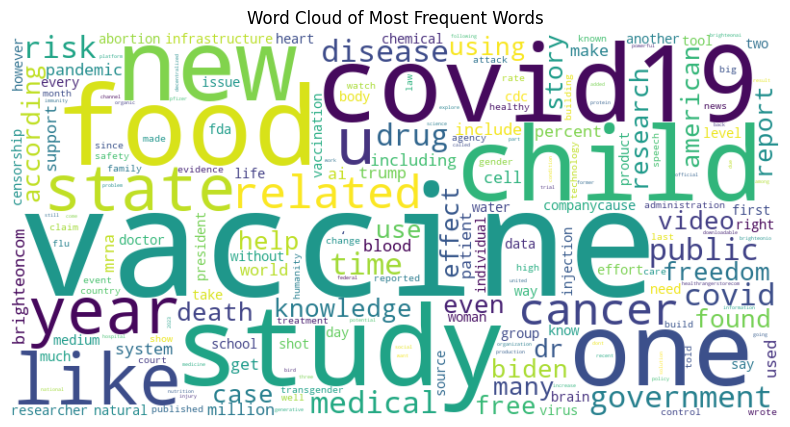

In [21]:
# Create a word pool (frequency distribution) for FAKE NEWS
word_pool = Counter()
for tokens in fake_tokens:
    word_pool.update(tokens)

# Display the most common words
print("\nWord Pool (Top 20):")
print(word_pool.most_common(50))

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_pool)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()

Second step we will have is processing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB

def prepare_data(df, vectorizer_type='bert', max_features=None, ngram_range=(1, 1), test_size=0.2, random_state=42):
    # Check if required columns exist
    if 'msg_lemmatized' not in df.columns or 'annotation' not in df.columns:
        raise ValueError("The DataFrame must contain 'msg_lemmatized' and 'annotation' columns.")

    # Process content column
    X = df['msg_lemmatized'].apply(lambda tokens: " ".join(tokens) if isinstance(tokens, list) else tokens)
    y = df['annotation']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize vectorizer or BERT model
    vectorizer = None
    if vectorizer_type == 'count':
        # Use CountVectorizer
        vectorizer = CountVectorizer(max_features=max_features, ngram_range=ngram_range)
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
    elif vectorizer_type == 'bert':
        # Use BERT for document embeddings
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        model = BertModel.from_pretrained('bert-base-uncased')

        # Function to generate BERT document embeddings
        def get_bert_embeddings(texts, tokenizer, model, max_length=512):
            embeddings = []
            for text in texts:
                # Tokenize and encode the text
                inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=max_length)
                
                # Get the BERT embeddings
                with torch.no_grad():
                    outputs = model(**inputs)
                
                # Use the [CLS] token embedding as the document embedding
                cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
                embeddings.append(cls_embedding)
            
            return np.array(embeddings)

        # Generate BERT document embeddings
        X_train_vec = get_bert_embeddings(X_train, tokenizer, model)
        X_test_vec = get_bert_embeddings(X_test, tokenizer, model)
    else:
        raise ValueError("Invalid vectorizer_type. Choose 'count' or 'bert'.")

    return X_train_vec, X_test_vec, y_train, y_test, vectorizer

In [26]:


def train_naive_bayes(X_train_vec, y_train):
    # Initialize and train Gaussian Naive Bayes classifier
    nb_model = GaussianNB()
    nb_model.fit(X_train_vec, y_train)  # No need for .toarray() here
    return nb_model

def train_svm(X_train_vec, y_train):
    # Initialize and train SVM classifier with increased max_iter
    svm_model = LinearSVC(random_state=42, max_iter=5000)  # Increase max_iter for convergence
    svm_model.fit(X_train_vec, y_train)
    return svm_model

def train_logistic_regression(X_train_vec, y_train):
    # Train Logistic Regression with a specified solver
    logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)  # Use 'lbfgs' solver
    logistic_model.fit(X_train_vec, y_train)
    return logistic_model

def evaluate_model(model, X_test_vec, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test_vec)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{model_name} Results:')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    return y_pred


In [27]:
# Main execution
from sklearn.model_selection import cross_val_score

# Main execution with cross-validation and validation split
def main(df):
    # Prepare data
    X_train_vec, X_test_vec, y_train, y_test, vectorizer = prepare_data(df)

   # Cross-validation for Naive Bayes
    nb_model = train_naive_bayes(X_train_vec, y_train)
    nb_cv_scores = cross_val_score(nb_model, X_train_vec, y_train, cv=5, scoring='accuracy')
    print(f'Naive Bayes Cross-Validation Accuracy: {nb_cv_scores.mean() * 100:.2f}%')

    # Cross-validation for SVM
    svm_model = train_svm(X_train_vec, y_train)
    svm_cv_scores = cross_val_score(svm_model, X_train_vec, y_train, cv=5, scoring='accuracy')
    print(f'SVM Cross-Validation Accuracy: {svm_cv_scores.mean() * 100:.2f}%')

    # Logistic regression
    logistic_model = train_logistic_regression(X_train_vec, y_train)
    logistic_regression_cv_scores = cross_val_score(logistic_model, X_train_vec, y_train, cv=5, scoring='accuracy')
    print(f'Logistic Regression Cross-Validation Accuracy: {logistic_regression_cv_scores.mean() * 100:.2f}%')

    # Train and evaluate Naive Bayes
    nb_predictions = evaluate_model(nb_model, X_test_vec, y_test, "Naive Bayes")

    # Train and evaluate SVM
    svm_predictions = evaluate_model(svm_model, X_test_vec, y_test, "Support Vector Machine")

    # Train and evaluate logistic regression
    logistic_regression_predictions = evaluate_model(logistic_model, X_test_vec, y_test, "Logistic Regression")


    return {
        'naive_bayes': {
            'model': nb_model,
            'predictions': nb_predictions,
            'cv_scores': nb_cv_scores
        },
        'svm': {
            'model': svm_model,
            'predictions': svm_predictions,
            'cv_scores': svm_cv_scores
        },
        'logistic_regression': {
            'model': logistic_model,
            'predictions': logistic_regression_predictions,
            'val_accuracy': logistic_regression_cv_scores
        },
        'vectorizer': vectorizer
    }

In [28]:
# Example usage
if __name__ == "__main__":
    # Assuming df is your DataFrame
    results = main(df)

Naive Bayes Cross-Validation Accuracy: 83.04%
SVM Cross-Validation Accuracy: 91.96%
Logistic Regression Cross-Validation Accuracy: 93.62%

Naive Bayes Results:
Accuracy: 79.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       276
           1       0.80      0.80      0.80       285

    accuracy                           0.80       561
   macro avg       0.80      0.80      0.80       561
weighted avg       0.80      0.80      0.80       561


Support Vector Machine Results:
Accuracy: 93.23%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       276
           1       0.95      0.91      0.93       285

    accuracy                           0.93       561
   macro avg       0.93      0.93      0.93       561
weighted avg       0.93      0.93      0.93       561


Logistic Regression Results:
Accuracy: 93.94%

Classification Report:
